<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_GMM/blob/main/Agglomerative_Clustering_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative Hierarchical Clustering - Clustering Jerárquico

Este notebook muestra cómo aplicar el algoritmo jerárquico **Agglomerative Clustering** con explicación paso a paso, visualización de dendrograma y evaluación de métricas.

**Objetivos:**
- Aplicar Agglomerative Clustering sobre datos simulados.
- Visualizar la jerarquía de agrupamientos con dendrograma.
- Evaluar la calidad de los clústeres con métricas.
- Concluir sobre las fortalezas y limitaciones del enfoque jerárquico.

In [2]:
# Paso 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Paso 2: Generar datos sintéticos
Creamos datos artificiales con 3 agrupaciones para probar el algoritmo.

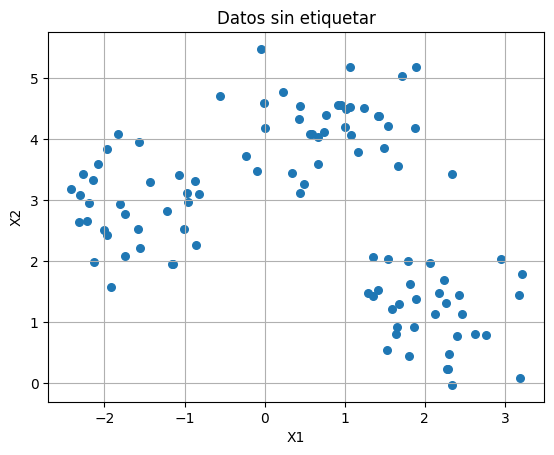

In [3]:
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Visualizar los datos generados
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Datos sin etiquetar")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Paso 3: Visualizar el dendrograma
El dendrograma nos muestra cómo se agrupan los puntos de manera jerárquica.

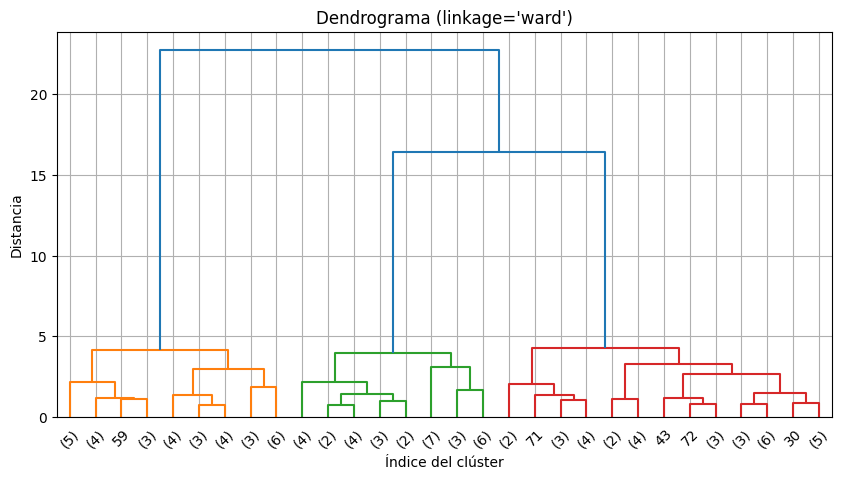

In [4]:
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrograma (linkage='ward')")
plt.xlabel("Índice del clúster")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

## Paso 4: Aplicar Agglomerative Clustering
Seleccionamos 3 clústeres como resultado final del agrupamiento jerárquico.

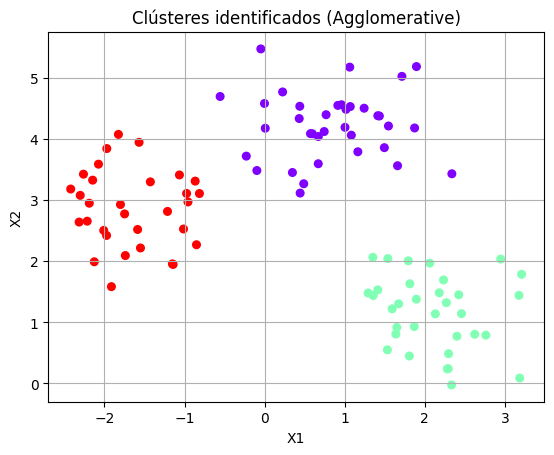

In [6]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

labels = model.fit_predict(X)

# Visualizar los clústeres encontrados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=30)
plt.title("Clústeres identificados (Agglomerative)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Paso 5: Evaluar el rendimiento del clustering
Usamos métricas de **Silhouette Score** y **Davies-Bouldin Score** para evaluar la calidad de los clústeres.

In [7]:
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

Silhouette Score: 0.6386
Davies-Bouldin Score: 0.4973


## Paso 6: Conclusiones

- El dendrograma permite explorar la jerarquía de agrupamientos de forma intuitiva.
- El **Silhouette Score alto** sugiere que los clústeres están bien separados.
- El **Davies-Bouldin Score bajo** indica que los clústeres son compactos.
- Este método es útil cuando queremos entender la estructura jerárquica de los datos sin predefinir K.
- **Limitaciones:** Alto costo computacional en grandes volúmenes y decisiones irreversibles una vez fusionados los clústeres.

**Resultado:** El algoritmo jerárquico aglomerativo es una excelente herramienta para exploración de datos cuando se requiere una visión estructural de las relaciones entre puntos.